In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
import yfinance as yf

In [2]:
def fetch_data(ticker):
    stock = yf.Ticker(ticker)
    hist = stock.history(period="5y")
    return hist

ticker = "AMZN"  # Example ticker
data = fetch_data(ticker)

In [3]:
data.tail()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2025-03-12 00:00:00-04:00,200.720001,201.520004,195.289993,198.889999,43679300,0.0,0.0
2025-03-13 00:00:00-04:00,198.169998,198.880005,191.820007,193.889999,41270800,0.0,0.0
2025-03-14 00:00:00-04:00,197.410004,198.649994,195.320007,197.949997,38096700,0.0,0.0
2025-03-17 00:00:00-04:00,198.770004,199.000000,194.320007,195.740005,47283400,0.0,0.0
2025-03-18 00:00:00-04:00,192.520004,193.939896,189.399994,193.320007,28126089,0.0,0.0


In [4]:
data.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2020-03-18 00:00:00-04:00,87.500000,92.083000,87.250000,91.500000,192904000,0.0,0.0
2020-03-19 00:00:00-04:00,93.000000,97.250000,91.632500,94.046501,207998000,0.0,0.0
2020-03-20 00:00:00-04:00,96.315498,97.849998,91.036499,92.304497,196358000,0.0,0.0
2020-03-23 00:00:00-04:00,91.387497,95.970001,90.599998,95.141502,156170000,0.0,0.0
2020-03-24 00:00:00-04:00,97.574997,97.750000,95.016998,97.004997,142942000,0.0,0.0


In [5]:
data.describe()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
count,1257.000000,1257.000000,1257.000000,1257.000000,1.257000e+03,1257.0,1257.000000
mean,151.803252,153.635562,149.807810,151.756062,6.589101e+07,0.0,0.015911
std,33.612358,33.667573,33.397300,33.537941,3.204905e+07,0.0,0.564108
min,82.800003,83.480003,81.430000,81.820000,1.500750e+07,0.0,0.000000
25%,126.120003,128.020004,124.366997,126.279999,4.434200e+07,0.0,0.000000
50%,156.813995,158.751999,154.679993,156.552994,5.859730e+07,0.0,0.000000
75%,173.368500,174.800003,171.542496,173.126007,7.830800e+07,0.0,0.000000
max,239.020004,242.520004,238.029999,242.059998,2.726620e+08,0.0,20.000000


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1257 entries, 2020-03-18 00:00:00-04:00 to 2025-03-18 00:00:00-04:00
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          1257 non-null   float64
 1   High          1257 non-null   float64
 2   Low           1257 non-null   float64
 3   Close         1257 non-null   float64
 4   Volume        1257 non-null   int64  
 5   Dividends     1257 non-null   float64
 6   Stock Splits  1257 non-null   float64
dtypes: float64(6), int64(1)
memory usage: 78.6 KB


<Axes: xlabel='Date'>

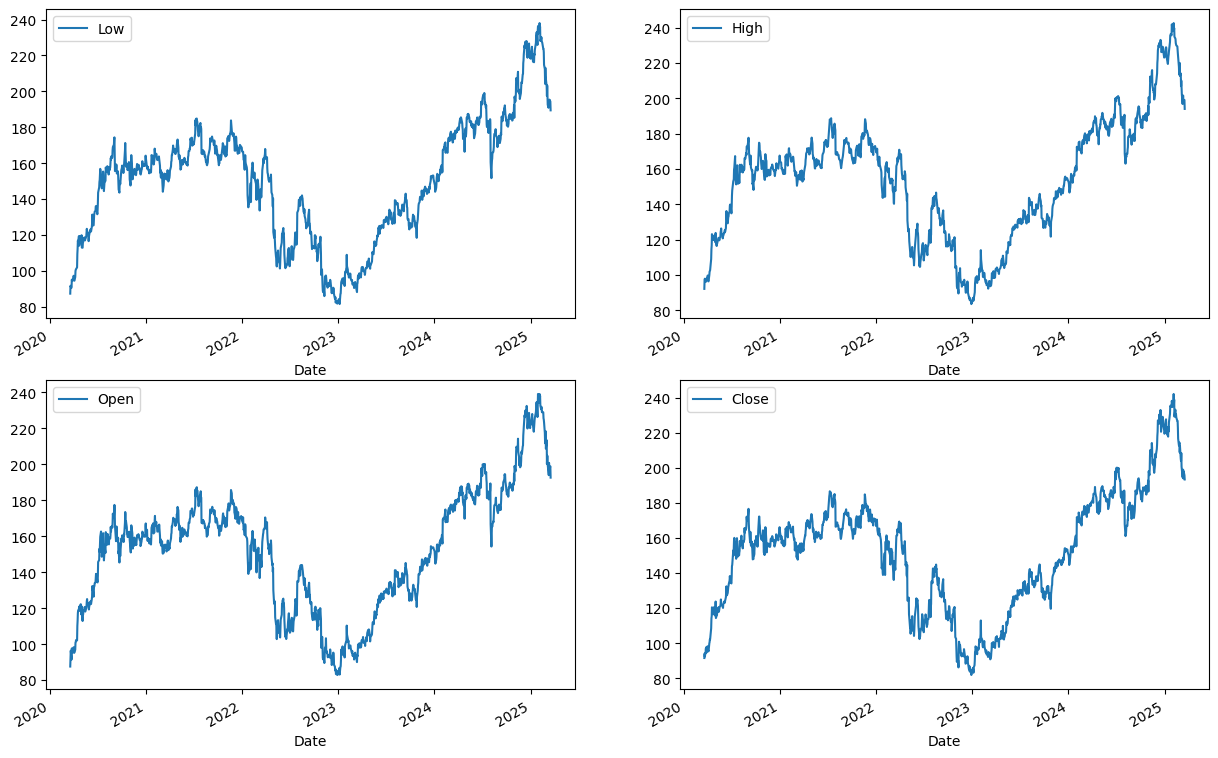

In [7]:
fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(10)
fig.set_figwidth(15)
data[['Low']].plot(ax = axes[0,0])
data[['High']].plot(ax = axes[0,1])
data[['Open']].plot(ax = axes[1,0])
data[['Close']].plot(ax = axes[1,1])

In [8]:
ma_day = [10, 15, 30, 60]
for ma in ma_day:
    column_name = f"MA_{ma}days"
    data[column_name] = data['Close'].rolling(ma).mean()

In [9]:
data.tail()

,Open,High,Low,Close,Volume,Dividends,Stock Splits,MA_10days,MA_15days,MA_30days,MA_60days
Date,,,,,,,,,,,
2025-03-12 00:00:00-04:00,200.720001,201.520004,195.289993,198.889999,43679300,0.0,0.0,202.817000,207.166001,220.255666,223.224000
2025-03-13 00:00:00-04:00,198.169998,198.880005,191.820007,193.889999,41270800,0.0,0.0,201.331999,205.233334,218.816332,222.639333
2025-03-14 00:00:00-04:00,197.410004,198.649994,195.320007,197.949997,38096700,0.0,0.0,199.898999,203.991334,217.593332,222.147500
2025-03-17 00:00:00-04:00,198.770004,199.000000,194.320007,195.740005,47283400,0.0,0.0,198.970999,202.860001,216.195333,221.527667
2025-03-18 00:00:00-04:00,192.520004,193.939896,189.399994,193.320007,28126089,0.0,0.0,197.923000,201.561334,214.725333,220.897167


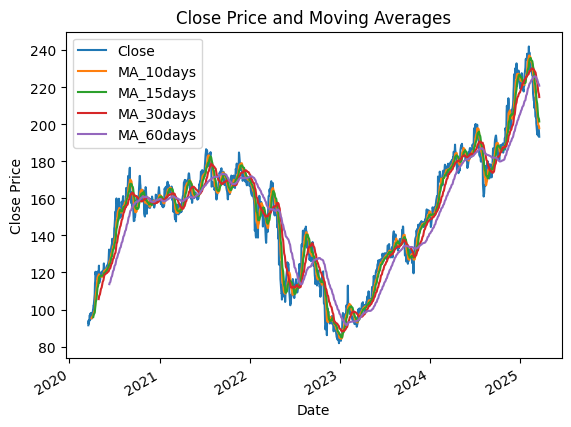

In [11]:
data[['Close', 'MA_10days', 'MA_15days', 'MA_30days', 'MA_60days']].plot()
plt.title('Close Price and Moving Averages')
plt.ylabel('Close Price')
plt.show()

In [12]:
data['Daily Return'] = data['Close'].pct_change()

In [13]:
data.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits,MA_10days,MA_15days,MA_30days,MA_60days,Daily Return
Date,,,,,,,,,,,,
2020-03-18 00:00:00-04:00,87.500000,92.083000,87.250000,91.500000,192904000,0.0,0.0,NaN,NaN,NaN,NaN,NaN
2020-03-19 00:00:00-04:00,93.000000,97.250000,91.632500,94.046501,207998000,0.0,0.0,NaN,NaN,NaN,NaN,0.027831
2020-03-20 00:00:00-04:00,96.315498,97.849998,91.036499,92.304497,196358000,0.0,0.0,NaN,NaN,NaN,NaN,-0.018523
2020-03-23 00:00:00-04:00,91.387497,95.970001,90.599998,95.141502,156170000,0.0,0.0,NaN,NaN,NaN,NaN,0.030735
2020-03-24 00:00:00-04:00,97.574997,97.750000,95.016998,97.004997,142942000,0.0,0.0,NaN,NaN,NaN,NaN,0.019587


<Axes: xlabel='Date'>

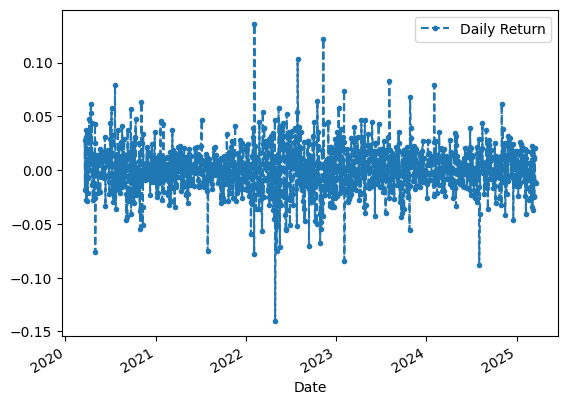

In [14]:
data['Daily Return'].plot(legend=True, linestyle='--', marker='.')

Text(0.5, 1.0, 'Amazon Daily Returns')

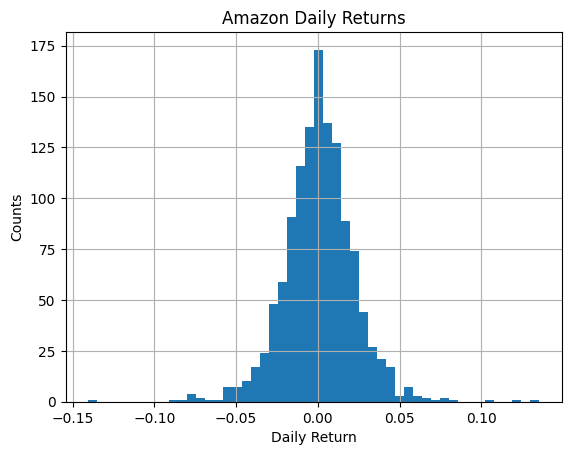

In [15]:
data['Daily Return'].hist(bins=50)
plt.xlabel('Daily Return')
plt.ylabel('Counts')
plt.title('Amazon Daily Returns')

In [16]:
# Normalize and create sequences
def create_sequences(data, seq_length):
    scaler = MinMaxScaler()
    data_scaled = scaler.fit_transform(data)
    sequences, labels = [], []
    for i in range(len(data_scaled) - seq_length):
        sequences.append(data_scaled[i:i+seq_length])
        labels.append(data_scaled[i+seq_length])
    return np.array(sequences), np.array(labels), scaler

In [17]:
df = data[['Close']]

In [18]:
# Load & preprocess data
seq_length = 60  # Use past 60 days to predict next day
X, y, scaler = create_sequences(df.values, seq_length)

In [19]:
# Train-val-test split
train_split = int(0.8 * len(X))
val_split = int(0.9 * len(X))
X_train, X_val, X_test = X[:train_split], X[train_split:val_split], X[val_split:]
y_train, y_val, y_test = y[:train_split], y[train_split:val_split], y[val_split:]

In [20]:
print(X_train.shape, X_val.shape, X_test.shape)

(957, 60, 1) (120, 60, 1) (120, 60, 1)


In [21]:
print(y_train.shape, y_val.shape, y_test.shape)

(957, 1) (120, 1) (120, 1)


In [22]:
# Build LSTM Model
model = Sequential([
    LSTM(units = 128, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])),  # Adjust input_shape
    Dropout(0.2),
    LSTM(units = 128, return_sequences=True),
    Dropout(0.2),
    LSTM(units = 64, return_sequences=False),
    Dense(32, activation="relu"),
    Dense(1)  # Output layer - Adjust to match y_train shape
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 60, 128)             │          66,560 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 60, 128)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 60, 128)             │         131,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 60, 128)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_2 (LSTM)                        │ (None, 64)                  │          49,408 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 249,665 (975.25 KB)

 Trainable params: 249,665 (975.25 KB)

 Non-trainable params: 0 (0.00 B)

In [23]:
# Callbacks
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.8, patience=10)

In [24]:
# Train model
model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=100, batch_size=32, verbose=1, callbacks=[early_stop, lr_scheduler])

Epoch 1/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 13s 215ms/step - loss: 0.0507 - val_loss: 0.0036 - learning_rate: 0.0010
Epoch 2/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 7s 233ms/step - loss: 0.0032 - val_loss: 0.0025 - learning_rate: 0.0010
Epoch 3/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 6s 187ms/step - loss: 0.0026 - val_loss: 0.0035 - learning_rate: 0.0010
Epoch 4/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 10s 192ms/step - loss: 0.0022 - val_loss: 0.0022 - learning_rate: 0.0010
Epoch 5/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 11s 200ms/step - loss: 0.0022 - val_loss: 0.0035 - learning_rate: 0.0010
Epoch 6/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 7s 221ms/step - loss: 0.0022 - val_loss: 0.0059 - learning_rate: 0.0010
Epoch 7/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 9s 194ms/step - loss: 0.0021 - val_loss: 0.0024 - learning_rate: 0.0010
Epoch 8/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 10s 193ms/step - loss: 0.0023 - val_loss: 0.0017 - learning_rate: 0.0010
Epoch 9/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 7s 229ms/step - loss: 0.0022 - val_loss: 0.0031 - learning_rate: 0.00

In [25]:
# Evaluate model on test set
test_loss = model.evaluate(X_test, y_test)
print(f"Test Loss: {test_loss}")

# Make predictions
y_pred = model.predict(X_test)
y_pred = scaler.inverse_transform(y_pred.reshape(-1, 1))
y_test = scaler.inverse_transform(y_test.reshape(-1, 1))

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step - loss: 0.0010    
Test Loss: 0.0011474686907604337
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 318ms/step


In [26]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test, y_pred)
print("Mean absolute error on test set: ", mae)

Mean absolute error on test set:  4.426449712117514


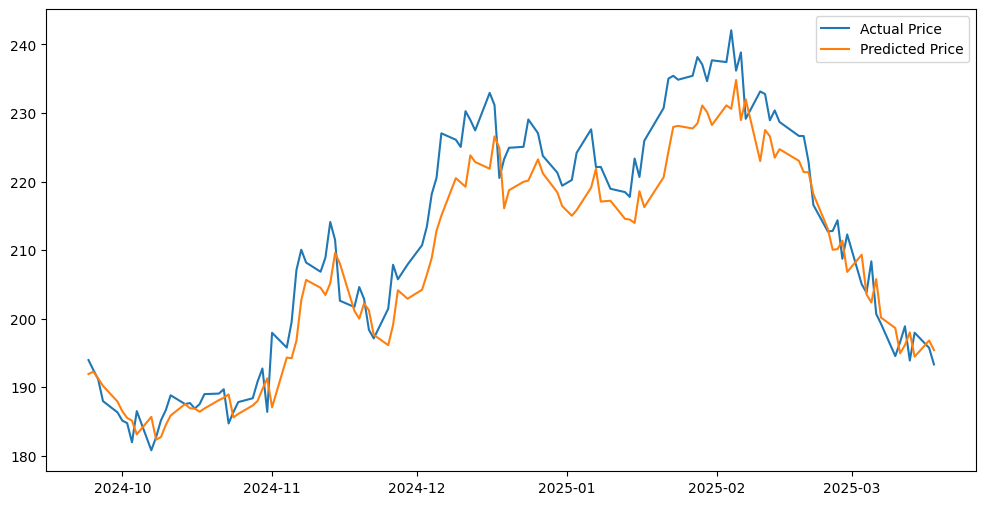

In [27]:
# Plot actual vs. predicted prices
plt.figure(figsize=(12, 6))
plt.plot(df.index[-len(y_test):], y_test, label="Actual Price")
plt.plot(df.index[-len(y_pred):], y_pred, label="Predicted Price")
plt.legend()
plt.show()

In [28]:
# Future predictions
def predict_future(n_days):
    last_seq = X_test[-1]  # Last available sequence
    future_preds = []
    for _ in range(n_days):
        pred = model.predict(last_seq.reshape(1, seq_length, 1))
        future_preds.append(pred[0, 0])
        last_seq = np.roll(last_seq, -1)
        last_seq[-1] = pred
    return scaler.inverse_transform(np.array(future_preds).reshape(-1, 1))

print(predict_future(7))  # Predict next 7 days

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 177ms/step
[[195.4162 ]
 [194.9592 ]
 [194.53546]
 [194.19374]
 [193.91327]
 [193.67061]
 [193.44476]]
